#1. 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/data/health_data.csv", encoding = 'utf-8')
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [5]:
data['시도코드'] = data['시도코드'].replace([11, 26, 27, 28, 29, 30, 31, 36, 41, 42, 43, 44, 45, 46, 47, 48, 49], ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'])
data['시도코드']

0       세종
1       대구
2       서울
3       울산
4       경기
        ..
9995    충남
9996    충북
9997    전북
9998    대구
9999    전북
Name: 시도코드, Length: 10000, dtype: object

In [6]:
data['성별코드'] = data['성별코드'].replace(['M', 'F'], ['남성', '여성'])
data['성별코드']

0       남성
1       여성
2       여성
3       남성
4       여성
        ..
9995    여성
9996    여성
9997    남성
9998    여성
9999    여성
Name: 성별코드, Length: 10000, dtype: object

#2. 마이닝

##1. BMI 지수

In [7]:
#BMI지수 계산 : 몸무게(kg)/신장(m)^2
data['BMI지수'] = data['체중(5Kg 단위)'] / ((data['신장(5Cm단위)'] * 0.01) * (data['신장(5Cm단위)'] * 0.01))
data['BMI지수']

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Name: BMI지수, Length: 10000, dtype: float64

In [8]:
data['BMI'] = 0
data.loc[data['BMI지수'] <= 18.5, 'BMI'] = '저체중'
data.loc[(data['BMI지수'] > 18.5) & (data['BMI지수'] < 23), 'BMI'] = '정상'
data.loc[(data['BMI지수'] >= 23) & (data['BMI지수'] < 25), 'BMI'] = '과체중'
data.loc[data['BMI지수'] >= 25, 'BMI'] = '비만'

In [9]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [10]:
data['BMI'].value_counts()

비만     3697
정상     3645
과체중    2285
저체중     373
Name: BMI, dtype: int64

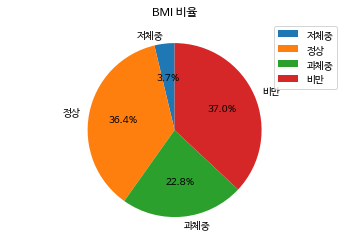

In [11]:
from matplotlib import font_manager

plt.rc('font', family='NanumBarunGothic')
plt.title('BMI 비율')

labels = ['저체중', '정상', '과체중', '비만']
values = [373, 3645, 2285, 3697]

plt.axis('equal')
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=90)
plt.legend()    # 범례 표시
plt.show()

BMI수치 정상(36.4%)에 비해 과체중+비만(59.8%) 비율이 상당한 것으로 보이고 있다.
이에 관련해 국민 건강 증진을 위해 BMI, 즉 비만과 다른 요소들의 연관성을 탐구하고자 한다.

##1-1. BMI와 성별

In [26]:
len(data.loc[(data['BMI'] == '저체중') & (data['성별코드'] == '남성')])

123

In [27]:
len(data.loc[(data['BMI'] == '정상') & (data['성별코드'] == '남성')])

1430

In [28]:
len(data.loc[(data['BMI'] == '과체중') & (data['성별코드'] == '남성')])

1251

In [29]:
len(data.loc[(data['BMI'] == '비만') & (data['성별코드'] == '남성')])

2334

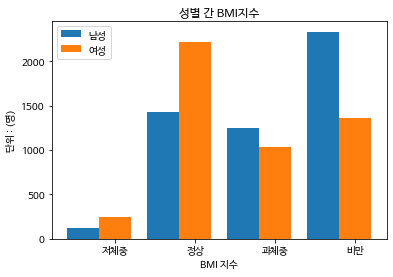

In [38]:
import numpy as np
BMI_M = [123, 1430, 1251, 2334]
BMI_F = [250, 2215, 1034, 1363]
index = np.arange(len(labels))


plt.bar(index, BMI_M, width = 0.4, label = '남성')
plt.bar(index + 0.4, BMI_F, width = 0.4, label = '여성')
plt.xticks(index + 0.4, labels)
plt.legend()
plt.xlabel('BMI 지수')
plt.ylabel('단위 : (명)')
plt.title('성별 간 BMI지수')
plt.show()

BMI와 성별을 함께 고려했을 때, 비교적 여성보다 남성이 비만율(과체중 이상)이 높은 것으로 드러났다.

##1-2. BMI와 혈청크레아티닌

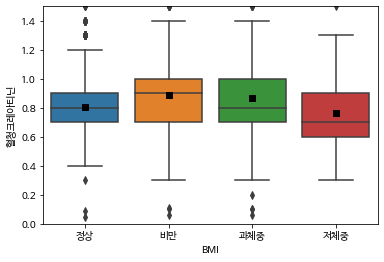

In [44]:
import seaborn as sns

plt.ylim(0, 1.5)
sns.boxplot(x="BMI", y="혈청크레아티닌", data=data, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

운동량과 관계가 있는 혈청크레아티닌과 BMI를 함께 보았을 때, BMI가 저체중인 경우의 혈청크레아티닌 중간 값이 정상 수치에 해당하는 0.8에 비교적 못 미치는 것으로 보인다.
따라서 다른 집단에 비해 저체중 집단은 근육을 사용하는 양, 즉 운동량이 비교적 적다고 해석할 수 있다.

##1-3. BMI와 콜레스테롤

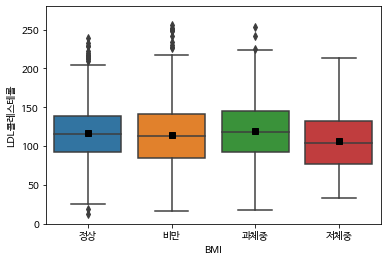

In [47]:
plt.ylim(0, 280)
sns.boxplot(x="BMI", y="LDL콜레스테롤", data=data, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

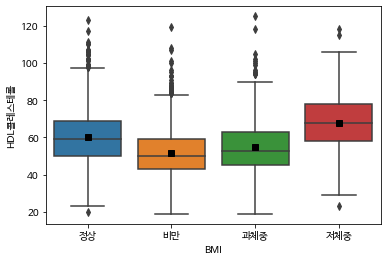

In [48]:
sns.boxplot(x="BMI", y="HDL콜레스테롤", data=data, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

각종 질병을 야기하는 LDL콜레스테롤과, 혈관 벽에 쌓인 나쁜 콜레스테롤을 제거하는 HDL콜레스테롤 수치를 각각 BMI와 함께 살펴보았다. 나쁜 콜레스테롤인 LDL은 그 수치가 비만, 과체중에서 비교적 더 높은 이상치 분포를 나타냈다. 또, 좋은 콜레스테롤인 HDL은 저체중과 정상에서 비교적 비만과 과체중보다 높은 분포를 나타냈다.

따라서, 이 결과를 통해 비만도와 질병을 유발할 수 있는 콜레스테롤의 수치 또한 관련이 있음을 확인하였다.